<a href="https://colab.research.google.com/github/marta-brasola/MachineLearningProject/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from statsmodels.graphics.mosaicplot import mosaic
from IPython.display import Markdown


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Airline passengers satisfaction analysis and classification


1. **Gender**: male or female
2. **Customer type**: regular or non-regular airline customer
3. **Age**: the actual age of the passenger
4. **Type of travel**: the purpose of the passenger's flight (personal or business travel)
5. **Class**: business, economy, economy plus
6. **Flight distance**
7. **Inflight wifi service**: satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. **Departure/Arrival time convenient**: departure/arrival time satisfaction level (0: not rated; 1-5)
9. **Ease of Online booking**: online booking satisfaction rate (0: not rated; 1-5)
10. **Gate location**: level of satisfaction with the gate location (0: not rated; 1-5)
11. **Food and drink**: food and drink satisfaction level (0: not rated; 1-5)
12. **Online boarding**: satisfaction level with online boarding (0: not rated; 1-5)
13. **Seat comfort**: seat satisfaction level (0: not rated; 1-5)
14. **Inflight entertainment**: satisfaction with inflight entertainment (0: not rated; 1-5)
15. **On-board service**: level of satisfaction with on-board service (0: not rated; 1-5)
16. **Leg room service**: level of satisfaction with leg room service (0: not rated; 1-5)
17. **Baggage handling**: level of satisfaction with baggage handling (0: not rated; 1-5)
18. **Checkin service**: level of satisfaction with checkin service (0: not rated; 1-5)
19. **Inflight service**: level of satisfaction with inflight service (0: not rated; 1-5)
20. **Cleanliness**: level of satisfaction with cleanliness (0: not rated; 1-5)
21. **Departure delay in minutes**
22. **Arrival delay in minutes**




In [2]:
train = pd.read_csv("/content/drive/MyDrive/progetto_travel/data/train.csv", index_col=[0])
test = pd.read_csv("/content/drive/MyDrive/progetto_travel/data/test.csv", index_col=[0])
print(f'shape of the train set: {train.shape}')
print(f'shape of the test set: {test.shape}')

shape of the train set: (103904, 24)
shape of the test set: (25976, 24)


In [3]:
train.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [5]:
def to_categorical(df, int_columns):
    for col in int_columns:
        df[df.columns[col]] = df[df.columns[col]].astype('category')
    return df

In [6]:
categorical_indexes = [1, 2, 4, 5] + list(range(7, 21)) + [23]
train = to_categorical(train, categorical_indexes)
test = to_categorical(test, categorical_indexes)

In [7]:
train.drop(columns='id', axis=1, inplace=True)
test.drop(columns='id', axis=1, inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

In [9]:
# palette1 = ['#0b3954','#087e8b','#bfd7ea','#ff5a5f','#c81d25']
# palette2 = ['#0b3954','#087e8b','#bfd7ea','##F6F5AE','#c81d25']

# EDA

Prima di tutto, dividi il dataset in una parte di training e una parte di test. Inizia ad analizzare il dataset. Presta attenzione a che dataset utilizzare per ogni punto (training, test o tutto?). Tra le varie cose da fare, considera anche:

Sono presenti degli outlier? Se sì, che percentuale? Trovi qui alcuni modi per l’identificazione degli outlier.
Ci sono variabili categoriche? Come pensi di trattarle?
le varie feature potrebbero avere valori molto diversi. Questo non è un bene per quasi qualsiasi algoritmo di ML, quindi valuta se applicare una Standardizzazione al dataset, come ad esempio StandardScaler(). Fai attenzione a escludere la colonna delle label!
Chiediti poi le seguenti domande:

Ci sono delle feature che presentano valori mancanti? Come ti comporti? Commenta le tue analisi in modo chiaro.
Controlla se il dataset è bilanciato?
Quanto sono correlate le variabili? Ci sono dei casi di multicollinearità (correlation coefficient uguale a 1)?
Sono tutte le variabili necessarie o posso selezionarne un sottoinsieme e trascurare le altre? Studia bene la correlation matrix ed effettua poi un test del Chi-square per vedere quali feature sono più importanti. Oltre al Chi-square prova la Mutual Information e confronta se le feature selezionate sono le stesse.\

## Is it a balaced set or not?

When dealing with a classification problem it is important to study whether or not the target variable is balanced or unbalanced. An unbalanced dataset has implication on the way I should train the model and evaluate the performance at the end, because it may require tecnique such as SMOTE.

In [10]:
round(train.satisfaction.value_counts(normalize=True),2)

neutral or dissatisfied    0.57
satisfied                  0.43
Name: satisfaction, dtype: float64

In this case, wiht a distribution of 57% for the neutral or dissatisfied class and 43% for the satisfied other class is not perfectly balanced, but it's not severly imbalanced either.

## Are Train and Test set different or similar in the distribution?

- andiamo ad esplorare il train e test set per vedere se sono differenti in termini di distribuzione
  - spiegare perché sto facendo questo lavoro e cosa comporterebbe avere train e test set distribuiti diversamente (soprattutto la variabile target)

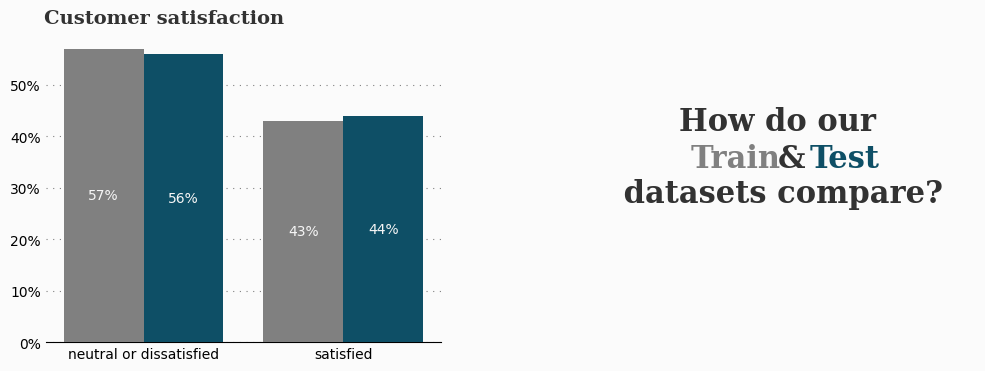

In [11]:
background_color = "#fbfbfb"

fig = plt.figure(figsize=(12,4))
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

## AX0 - SATISFACTION
train_ratio = round(train['satisfaction'].value_counts(normalize=True),2).reset_index()
train_ratio['satisfaction'] = train_ratio['satisfaction']*100
test_ratio = round(test['satisfaction'].value_counts(normalize=True),2).reset_index()
test_ratio['satisfaction'] = test_ratio['satisfaction']*100

x = np.arange(len(train_ratio))
ax0.text(-0.3, 62, 'Customer satisfaction', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.bar(x, height=train_ratio["satisfaction"], zorder=3, color="gray", width=0.4)
ax0.bar(x+0.4, height=test_ratio["satisfaction"], zorder=3, color="#0e4f66", width=0.4)
ax0.set_xticks(x + 0.4 / 2)
ax0.set_xticklabels(['neutral or dissatisfied','satisfied'])
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))

for i,j in zip([0, 1, 2], train_ratio["satisfaction"]):
    ax0.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6',
                 horizontalalignment='center', verticalalignment='center')

for i,j in zip([0, 1, 2], test_ratio["satisfaction"]):
    ax0.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6',
                 horizontalalignment='center', verticalalignment='center')

## AX4 - TITLE

ax1.spines["bottom"].set_visible(False)
ax1.tick_params(left=False, bottom=False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.text(0.5, 0.6, 'How do our\n\n datasets compare?', horizontalalignment='center', verticalalignment='center',fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")
ax1.text(0.28,0.57,"Train", fontweight="bold", fontfamily='serif', fontsize=22, color='gray')
ax1.text(0.5,0.57,"&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax1.text(0.58,0.57,"Test", fontweight="bold", fontfamily='serif', fontsize=22, color='#0e4f66')

## GENERAL SETTINGS
for i in range(0,2):
    locals()["ax"+str(i)].set_facecolor(background_color)

for i in range(0,2):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)


for s in ["top","right","left"]:
    for i in range(0,2):
        locals()["ax"+str(i)].spines[s].set_visible(False)

plt.show()

Both the train and the test set present the same distribution.

Now I am going to analyse some summary statistics about the numeric variables in the dataset.

In [12]:
train.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


**Age**: The distribution appears approximately normal, as the mean and median are close in value. The standard deviation (std) of 15 suggests some variability around the mean, indicating a moderate spread of data points. The relatively thicker tails of the distribution may suggest the presence of some outliers or extreme values.

**Flight Distance**: The distribution is right-skewed, as evidenced by the notable difference between the mean (1189) and the median (849). The higher standard deviation suggests a wide dispersion of data points, with some flights covering significantly longer distances, potentially indicating the presence of outliers or extreme values on the higher end of the spectrum.

**Departure Delay in Minutes** and **Arrival Delay in Minutes**: Both distributions exhibit a similar pattern. The mean being around 15 while the median is 0 implies a right-skewed distribution with a long tail to the right. The standard deviation of approximately 38 indicates a substantial variation around the mean, suggesting a considerable spread of delay times, possibly due to occasional significant delays

In [13]:
train.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4,neutral or dissatisfied
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179,58879


To have a better view on the categoriacl variables I decided to plot them all together.

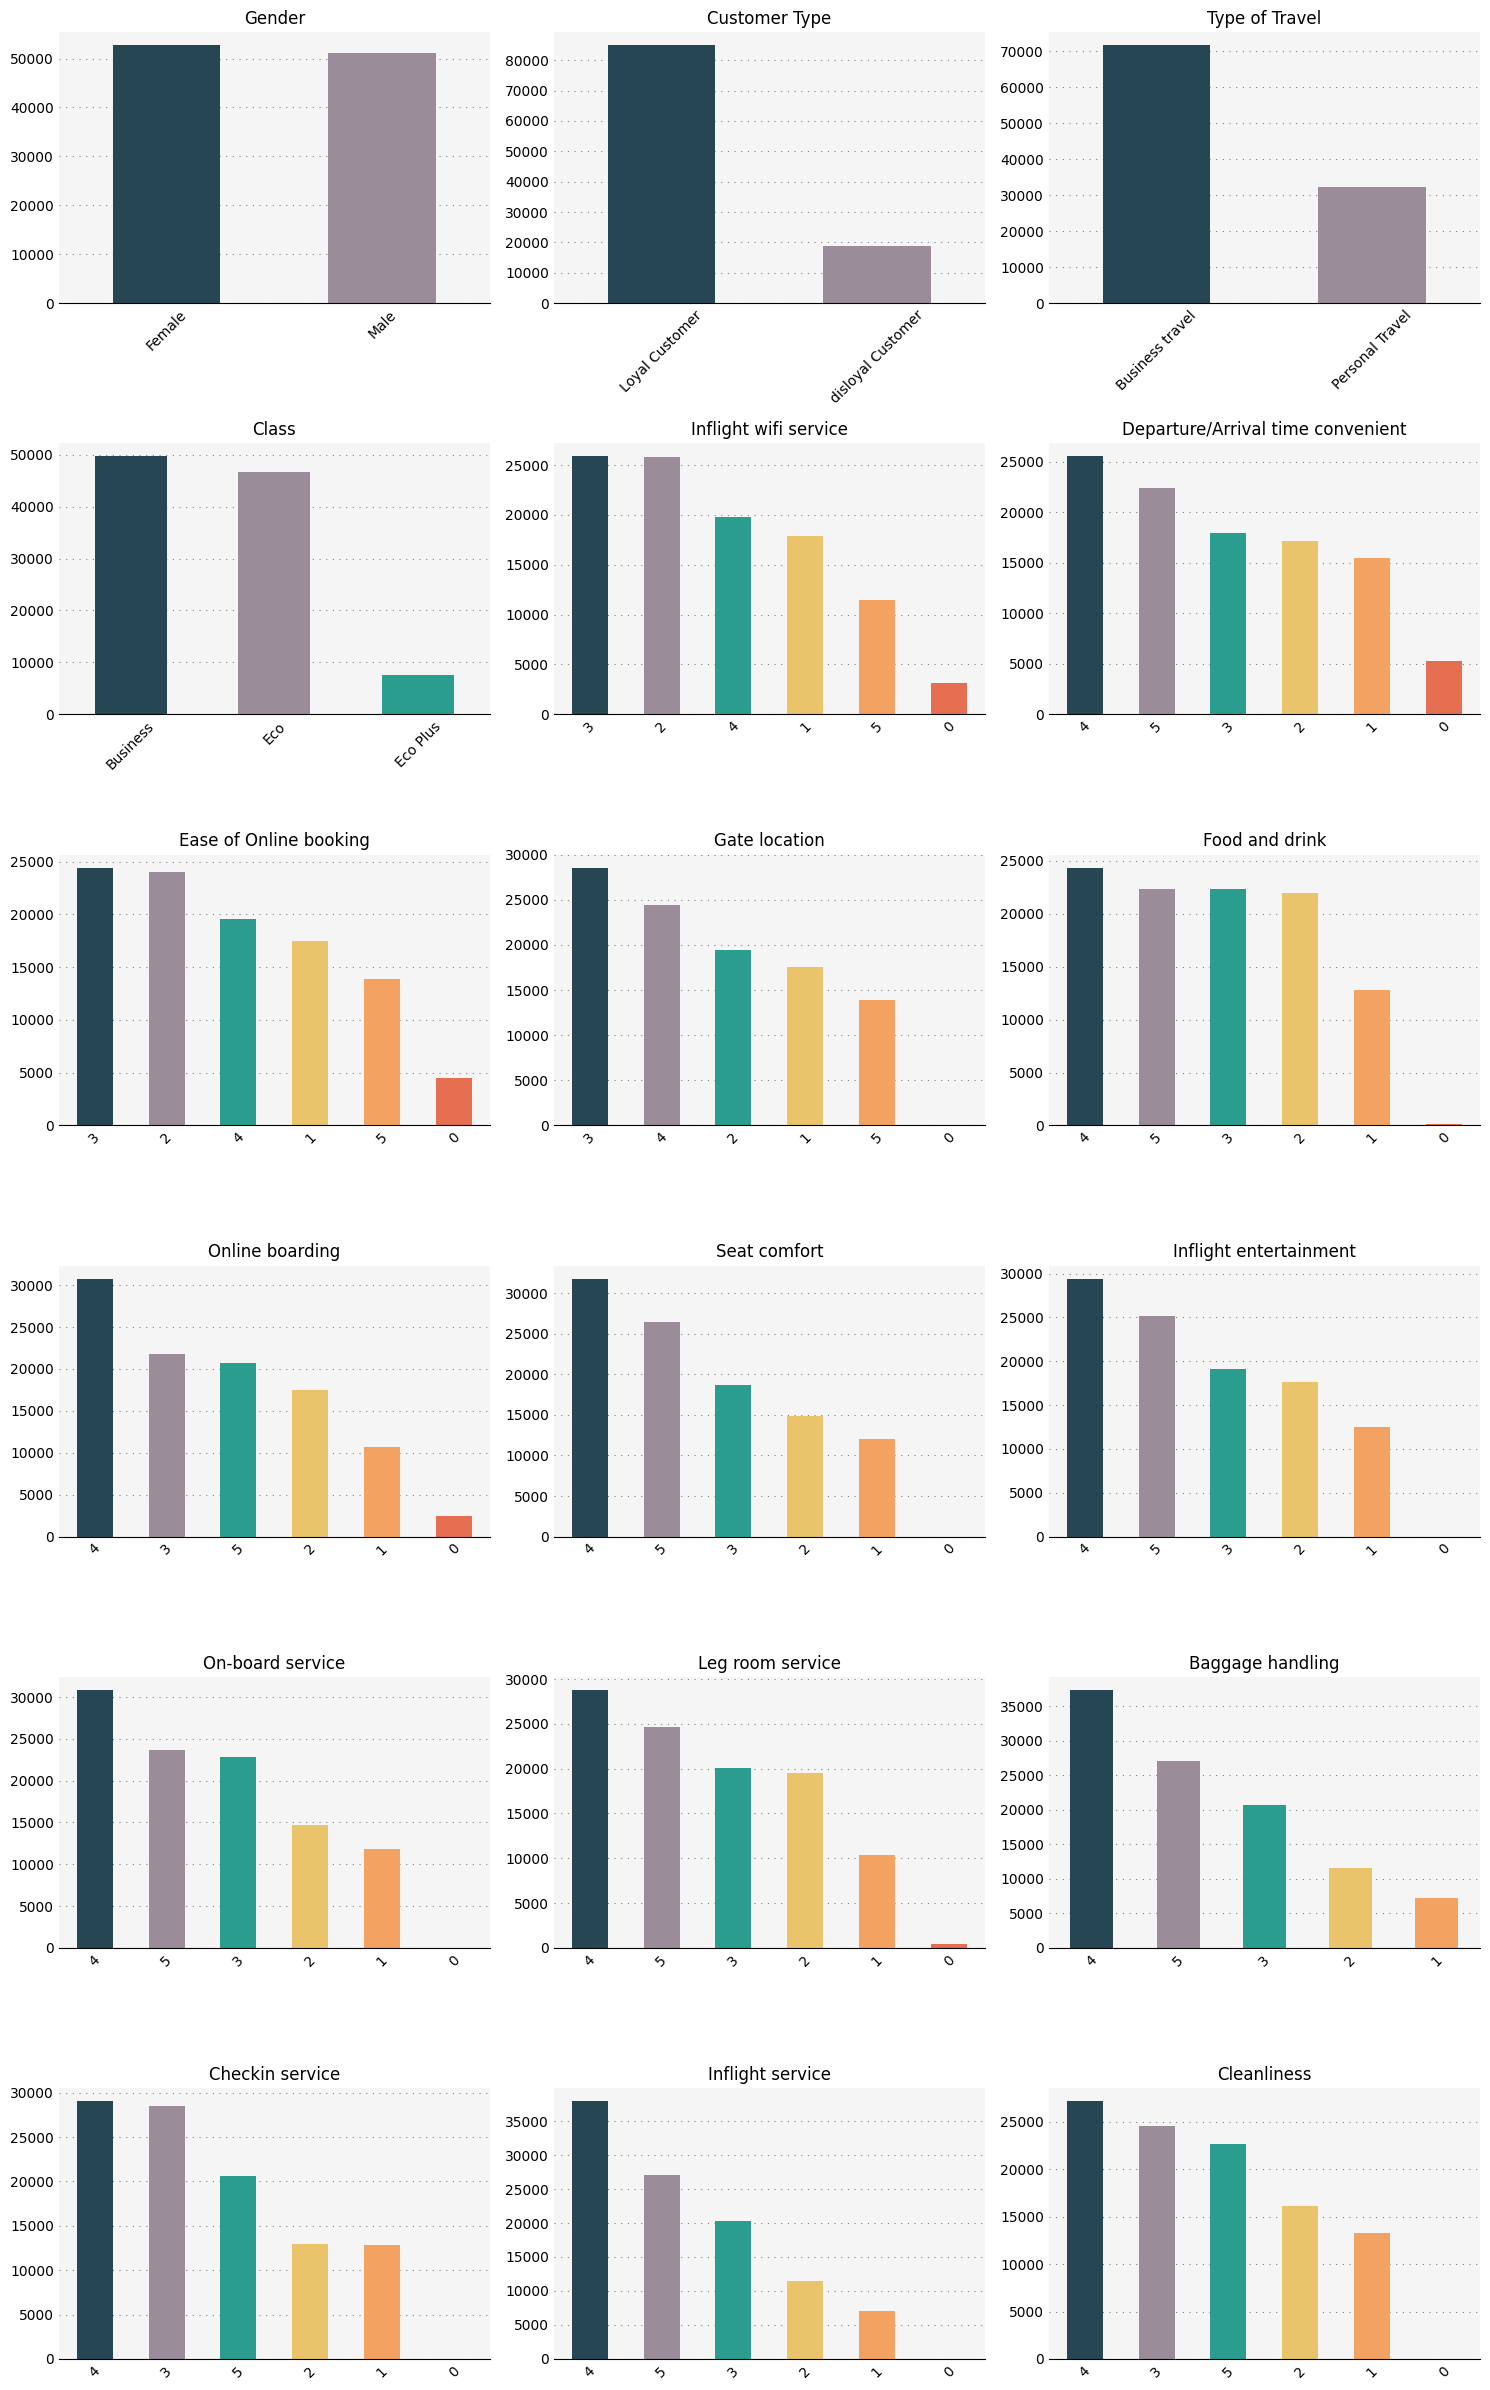

In [14]:
categorical_columns = [col for col in train.columns if pd.api.types.is_categorical_dtype(train[col])][:-1]

# Defining the custom color palette
custom_palette = ["#264653", "#9a8c98", "#2A9D8F", "#E9C46A", "#F4A261", "#E76F51"]

# Plotting the data
fig, axes = plt.subplots(6,3, figsize=(15, 24))

for i, column in enumerate(categorical_columns):
    ax = axes[i // 3, i % 3]
    train[column].value_counts().plot(kind='bar', ax=ax, color=custom_palette)
    ax.set_title(column)

    # Applying general settings
    background_color = '#f6f5f5'
    ax.set_facecolor(background_color)
    ax.tick_params(axis='both', which='both', length=0)

    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
    ax.grid(color='gray', linestyle=':', axis='y',  dashes=(1, 5))
    ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

### COMMENTS

- The sample includes an almost equal number of men and women.
- The majority of customers are loyal rather than disloyal.
- There is a significant imbalance towards business trips compared to personal ones.
- Inflight Wi-Fi, online boarding, and ease of online booking, as well as gate location, are the only services offered by this airline that do not have a 5-star rating in the top two spots. This suggests that these services need improvement.
- None of the services have a predominant 5-star rating,
- there are some services that have been rated as 0 by some people, raising the question of how a 0 rating should be interpreted.

There are columns such as Inflight Wi-Fi Service, Departure/Arrival Time Convenience, Ease of Online Booking, Online Boarding, and Leg Room Service that contain some zero values in their ratings. This could be due to two possible explanations:
1. The value of 0 is an actual rating provided by customers for that particular service.
2. In some cases, customers did not rate the service, leading to the value being treated as Null.

Referring to the official documentation on [Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data), a rating of 0 indicates "Not Applicable." This suggests that the specific person did not rate the service.


In [15]:
# Replace 0 with np.NaN in the categorical columns
for col in categorical_columns:
    train[col] = train[col].replace(0, np.NaN)

# Replace 0 with np.NaN in the categorical columns
for col in categorical_columns:
    test[col] = test[col].replace(0, np.NaN)

## Analysis against target variable

- fare boxplot per vedere la distribuzione delle variabili continue rispetto alla variabile target satisfaction. Tra departure e arrival delay prendo in considerazione sono Arrival Delay in minutes.

In [16]:
train.groupby('satisfaction')[train.select_dtypes(include=np.number).columns.tolist()].mean()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,
neutral or dissatisfied,37.566688,928.919971,16.503728,17.127536
satisfied,41.750583,1530.140255,12.608084,12.630799


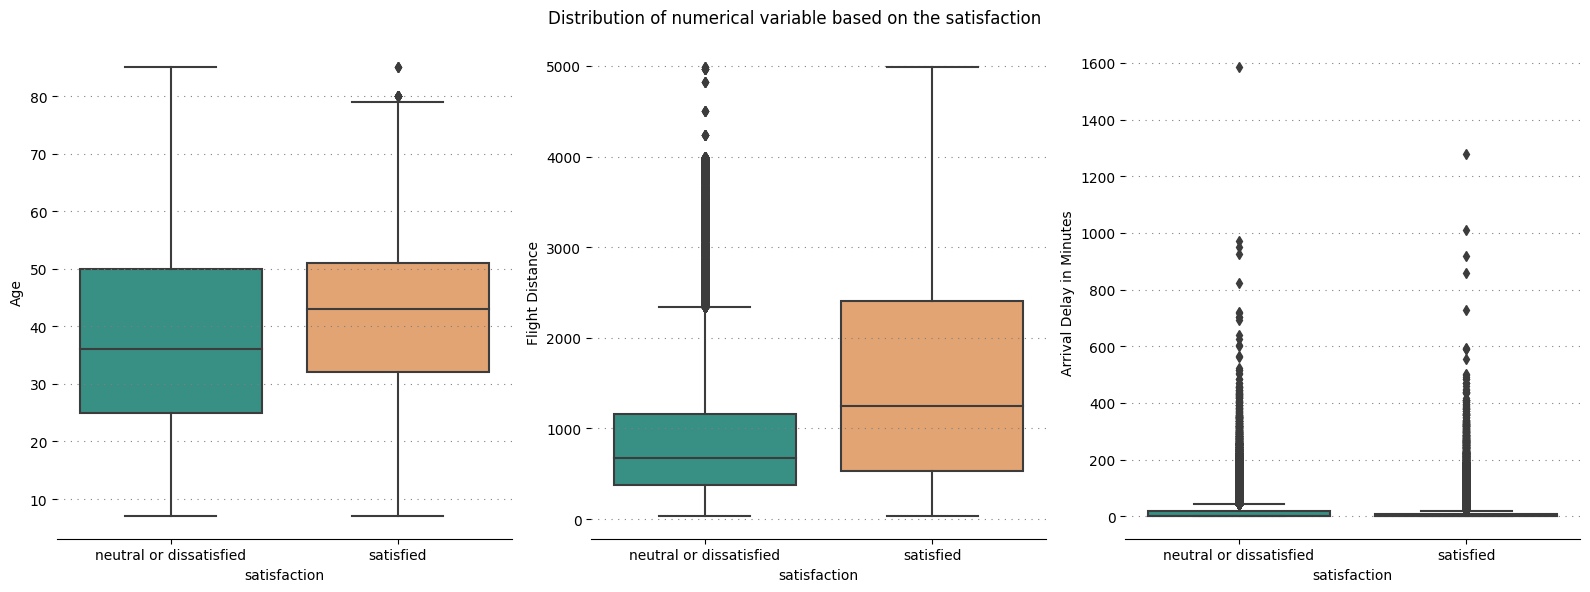

In [17]:
fig, ax = plt.subplots(1,3, figsize=(16,6))
palette = ['#2A9D8F', '#F4A261']
sns.boxplot(data=train, x='satisfaction', y='Age', ax=ax[0], palette=palette)
sns.boxplot(data=train, x='satisfaction', y='Flight Distance', ax=ax[1], palette=palette)
sns.boxplot(data=train, x='satisfaction', y='Arrival Delay in Minutes', ax=ax[2], palette=palette)

for a in ax:
    a.grid(color='gray', linestyle=':', axis='y',  dashes=(1, 5))
    for s in ["top", "right", "left"]:
        a.spines[s].set_visible(False)

plt.suptitle('Distribution of numerical variable based on the satisfaction')
plt.tight_layout()
plt.show()

ADD COMMENTS

- effettivamente le due distribuzioni sono un po' diverse in caso di essere soddisfatti o non esserlo
- la distribuzione dei ritardi di arrivi e partenze è talmente spiaccicata che non da informazioni

In [18]:
result_table = pd.crosstab(train['Customer Type'], train['satisfaction'])
cond_table = round(result_table.div(result_table.sum(1), axis=0), 2)
display(Markdown(f'**Contingency table between Customer Type and Satisfaction**\n'))
print(f'{cond_table}\n')

result_table = pd.crosstab(train['Type of Travel'], train['satisfaction'])
cond_table = round(result_table.div(result_table.sum(1), axis=0), 2)
display(Markdown(f'**Contingency table between Type of Travel and Satisfaction**\n'))
print(f'{cond_table}\n')

result_table = pd.crosstab(train['Class'], train['satisfaction'])
cond_table = round(result_table.div(result_table.sum(1), axis=0), 2)
display(Markdown(f'**Contingency table between Class and Satisfaction**\n'))
print(f'{cond_table}\n')

**Contingency table between Customer Type and Satisfaction**


satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                        0.52       0.48
disloyal Customer                     0.76       0.24



**Contingency table between Type of Travel and Satisfaction**


satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                     0.42       0.58
Personal Travel                     0.90       0.10



**Contingency table between Class and Satisfaction**


satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                         0.31       0.69
Eco                              0.81       0.19
Eco Plus                         0.75       0.25



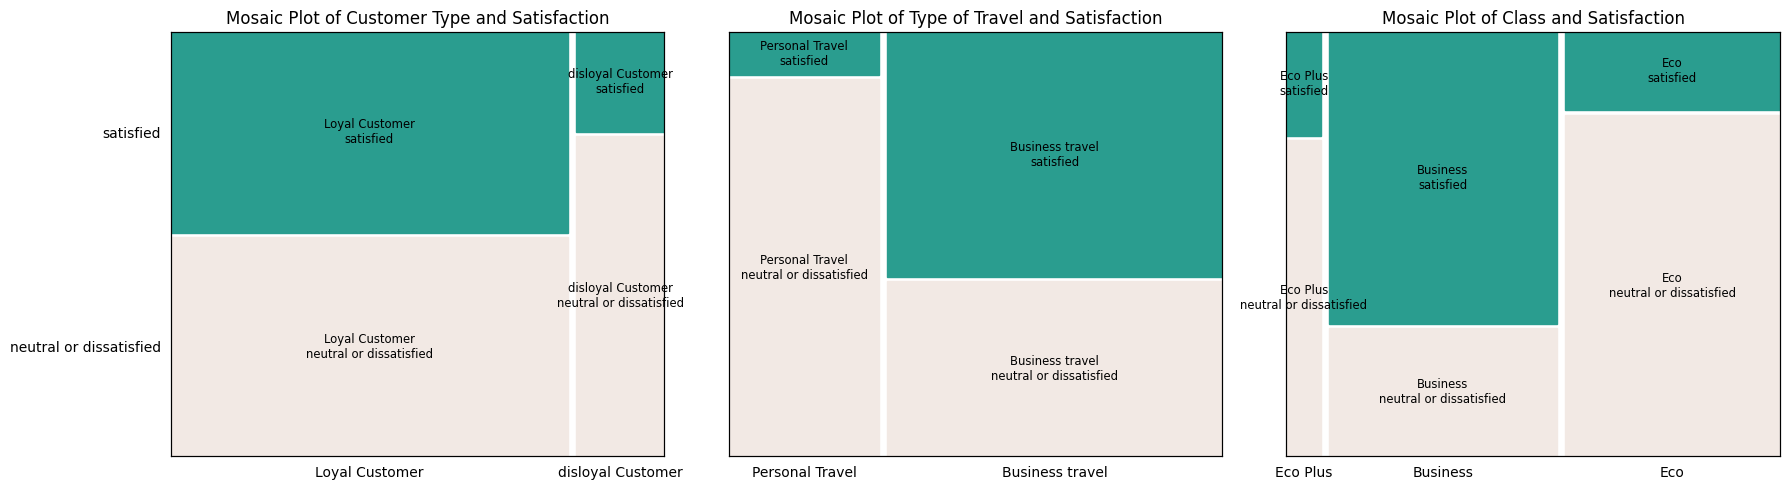

In [20]:
# Assuming train is your DataFrame
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Mosaic Plot for 'Customer Type'
mosaic(train, ['Customer Type', 'satisfaction'],
      gap=0.016,
       title='Mosaic Plot of Customer Type and Satisfaction',
       ax=axs[0],
       properties=lambda key: {'color': ('#f2e9e4', '#2A9D8F')[int(key[1] == 'satisfied')]})

# Mosaic Plot for 'Type of Travel'
mosaic(train, ['Type of Travel', 'satisfaction'],
       gap=0.016,
       title='Mosaic Plot of Type of Travel and Satisfaction',
       ax=axs[1],
       properties=lambda key: {'color': ('#f2e9e4', '#2A9D8F')[int(key[1] == 'satisfied')]})
axs[1].set_yticks([])
# Mosaic Plot for 'Class'
mosaic(train, ['Class', 'satisfaction'],
       gap=0.016,
       title='Mosaic Plot of Class and Satisfaction',
       ax=axs[2],
       properties=lambda key: {'color': ('#f2e9e4', '#2A9D8F')[int(key[1] == 'satisfied')]})
axs[2].set_yticks([])
# Adjusting layout and removing spines
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.yaxis.tick_left()
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

plt.tight_layout()
plt.show()


Firstly, among customer types, loyalty appears to contribute to a balanced satisfaction distribution, with loyal customers equally split between neutral or dissatisfied (0.52) and satisfied (0.48). Conversely, disloyal customers exhibit a pronounced dissatisfaction trend, representing 76% dissatisfaction compared to 24% satisfaction.

When considering the type of travel, business travelers stand out with a higher satisfaction rate (0.58) than dissatisfaction (0.42). On the other hand, personal travelers display a stark contrast, with 90% expressing dissatisfaction and only 10% reporting satisfaction.

Examining satisfaction across different travel classes reveals nuanced insights. Business class passengers are predominantly satisfied (0.69) with a relatively lower dissatisfaction rate (0.31). In contrast, both Economy and Economy Plus class passengers lean towards dissatisfaction, with rates of 81% and 75%, respectively.

These findings offer valuable insights for strategic decision-making. Recommendations include targeted efforts to enhance satisfaction among disloyal customers, a closer examination of factors contributing to dissatisfaction among personal travelers, and the implementation of improvements or incentives for passengers in Economy and Economy Plus classes. Overall, this analysis provides a foundation for optimizing customer satisfaction across diverse segments.

**Recommendations:**

- Target strategies to enhance satisfaction among disloyal customers.
- Explore factors contributing to dissatisfaction among personal travelers.
- Consider service improvements or targeted incentives for Economy and Economy Plus class passengers.

These insights guide further exploration and strategic decision-making to improve overall customer satisfaction.


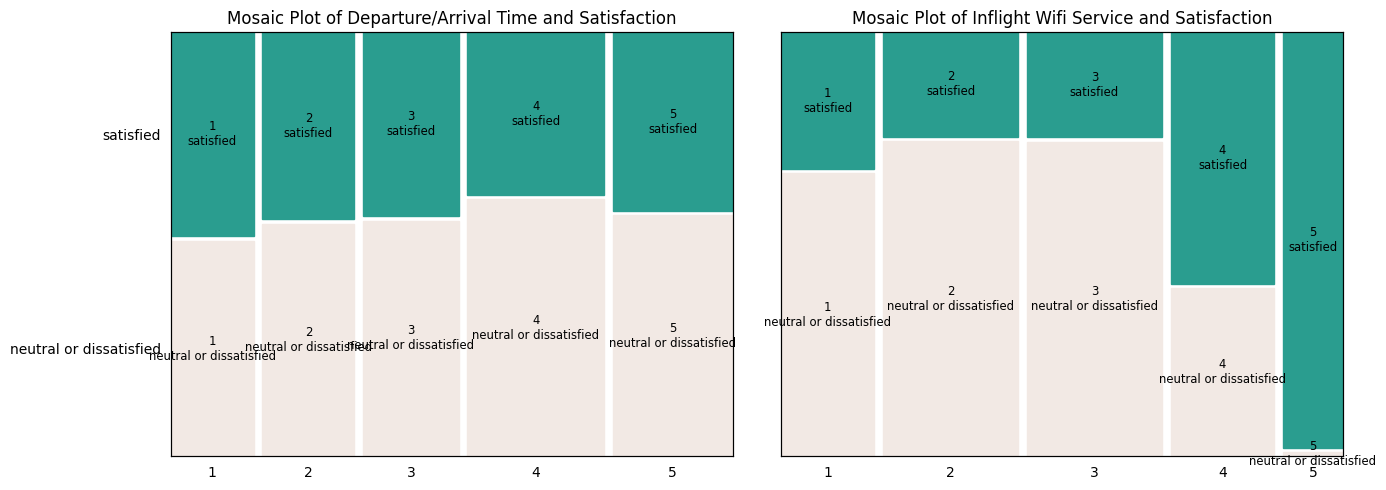

In [21]:
# Assuming train is your DataFrame
train['Departure/Arrival time convenient'] = pd.Categorical(train['Departure/Arrival time convenient'], categories=[1, 2, 3, 4, 5], ordered=True)
train['Inflight wifi service'] = pd.Categorical(train['Inflight wifi service'], categories=[1, 2, 3, 4, 5], ordered=True)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Mosaic Plot for 'Departure/Arrival time convenient'
mosaic(train, ['Departure/Arrival time convenient', 'satisfaction'],
       title='Mosaic Plot of Departure/Arrival Time and Satisfaction',
       ax=axs[0],
       properties=lambda key: {'color': ('#f2e9e4', '#2A9D8F')[int(key[1] == 'satisfied')]},
       gap=0.016)

# Mosaic Plot for 'Inflight wifi service'
mosaic(train, ['Inflight wifi service', 'satisfaction'],
       title='Mosaic Plot of Inflight Wifi Service and Satisfaction',
       ax=axs[1],
       properties=lambda key: {'color': ('#f2e9e4', '#2A9D8F')[int(key[1] == 'satisfied')]},
       gap=0.016)
axs[1].set_yticks([])  # Remove y-axis ticks for the second plot

# Adjusting layout and removing spines
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.yaxis.tick_left()
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

plt.tight_layout()
plt.show()

Interestingly, it is noted that satisfaction with the departure and arrival times does not have a significant impact on overall customer satisfaction at the end of the journey. On the other hand, services offered on the plane, including the quality of the food, seem to have a more pronounced effect. Specifically, nearly all customers who rated the onboard Wi-Fi service with 5 stars were satisfied with the overall travel experience

## Outliers Analysis

## Multicollinearity

- explain what multicollinearity is and what can imply to the estimation of the model
- check multicollinearity between numerical variables with partial and raw correlation
- look if I can compute correlation between categorical varaibles, how it's calculated and if it has significance

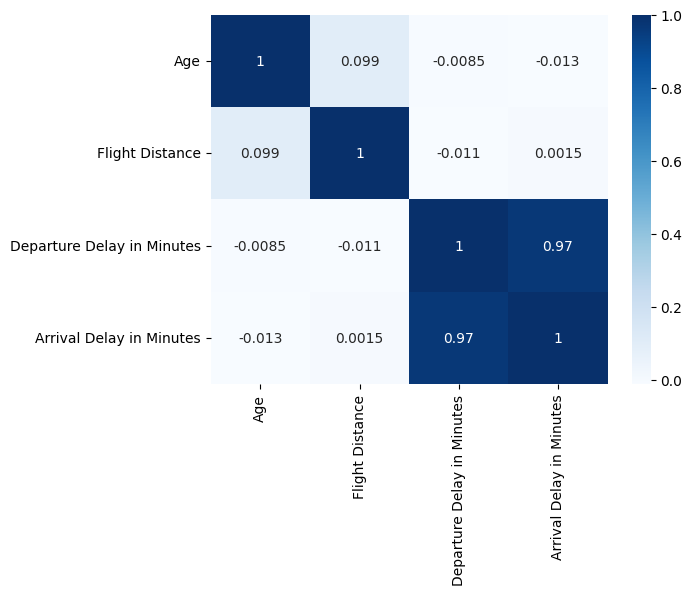

In [ ]:
corr = train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

Sono tutte le variabili necessarie o posso selezionarne un sottoinsieme e trascurare le altre? Studia bene la correlation matrix ed effettua poi un test del Chi-square per vedere quali feature sono più importanti. Oltre al Chi-square prova la Mutual Information e confronta se le feature selezionate sono le stesse.

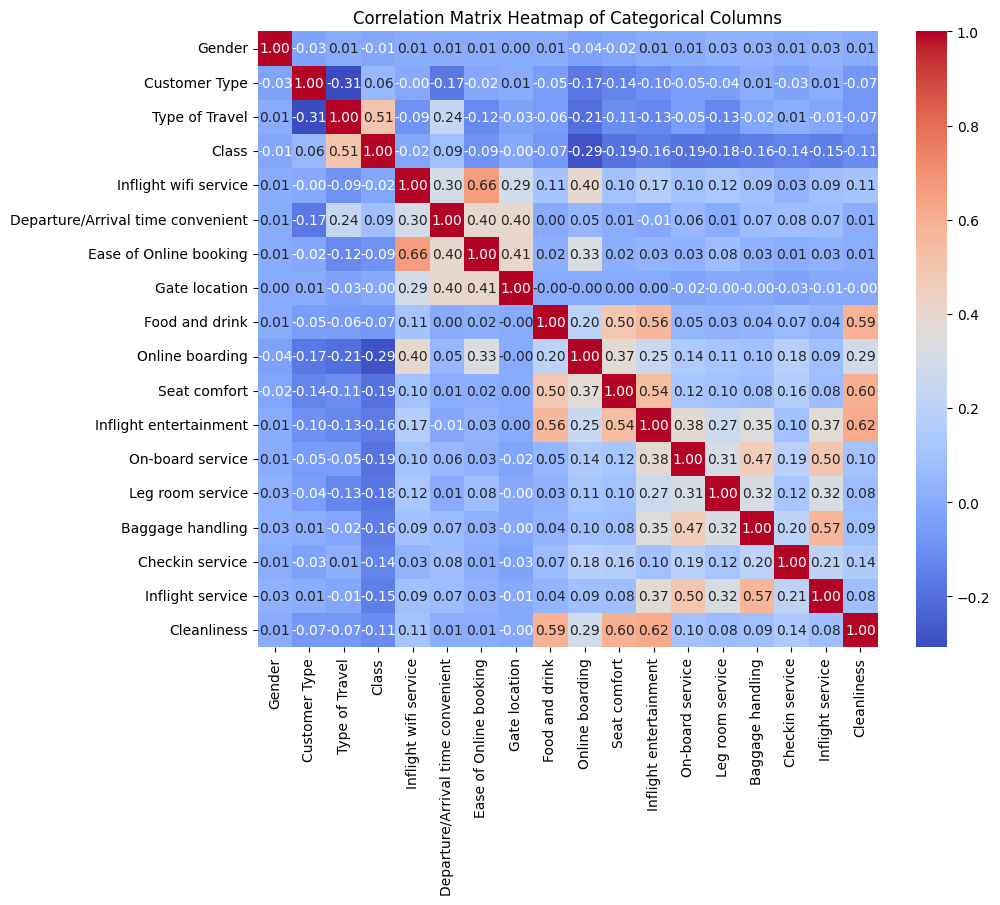

In [ ]:
train_categorical_numeric = train[categorical_columns].apply(lambda x: x.astype('category').cat.codes)

# Calculate the correlation between categorical columns
correlation_matrix = train_categorical_numeric.corr(method='kendall')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap of Categorical Columns')
plt.show()

# PREPROCESSING

During this phase I will focus on:
- handling missing values; --> DEVO DECIDERE COSA FARE CI SONO PARECCHIE COLONNE IN CUI DOVREI IMPUTARE I VALORI

DA QUI IN POI FARE UNA BELLA PIPELINE COSE RENDE IL TUTTO AUTOMATICO
- scaling;
- handling categorical values for models training.



## Handling missing values

I will now check if there are missing values or not in the dataset, both train and test set.

In [87]:
train.isnull().sum()

Gender                                  0
Customer Type                           0
Age                                     0
Type of Travel                          0
Class                                   0
Flight Distance                         0
Inflight wifi service                3103
Departure/Arrival time convenient    5300
Ease of Online booking               4487
Gate location                           1
Food and drink                        107
Online boarding                      2428
Seat comfort                            1
Inflight entertainment                 14
On-board service                        3
Leg room service                      472
Baggage handling                        0
Checkin service                         1
Inflight service                        3
Cleanliness                            12
Departure Delay in Minutes              0
Arrival Delay in Minutes              310
satisfaction                            0
dtype: int64


In this case missing values are less the 1% on both the train and test set.
There are many ways of imputing the missing values in a dataset, in this cases since there is an high linear correlation between the arrival and departure delay of a flight I decided to compute the missing values based an univariate linear regression.

In [89]:
train = train.dropna(axis=0)
test = test.dropna(axis=0)

# MODELS


devo provare due strade:

1. ADDESTRARE I MODELLI CON TUTTE LE FEATURE POSSIBILI
  - selezionare almeno 3 modelli (direi Logistic, SVM, RandomForest, AdaBoost, XGBoost)
  - spot check dei modelli scelti con la **k-fold cross validation** come metodo di evaluation
  - fine tuning degli iperparametri (sempre con la cross validation)
  - valutazione dei modelli sul test set --> scegliendo ovviamente la metrica adatta e spiegare la differenza tra accurracy, recall, precision...
2. ADDESTRARE I MODELLI CON LE FEATURE SELEZIONATE
  - selezionare almeno 3 modelli (direi Logistic, SVM, RandomForest, AdaBoost, XGBoost)
  - spot check dei modelli scelti con la **k-fold cross validation** come metodo di evaluation
  - fine tuning degli iperparametri (sempre con la cross validation)
  - valutazione dei modelli sul test set --> scegliendo ovviamente la metrica adatta e spiegare la differenza tra accurracy, recall, precision...

Pensa ora a come approcciare e impostare il problema della soddisfazione dei clienti della compagnia aerea. Scegli almeno tre modelli, tra cui RandomForest e AdaBoost. Di ogni modello scelto leggi la documentazione su sklearn.

Ora proviamo due strade diverse. La strada che chiamiamo 1) consiste nell’utilizzare tutte le feature disponibili, mentre la strada che chiamiamo 2) consiste nel selezionare le feature (3 o 4) che si sono dimostrate più rilevanti nel T-test di cui sopra. Per più rilevanti si intendono le feature che hanno un p-value sotto una certa soglia.

Esegui dunque la seguente procedura per entrambe le strade, prima con la 1) poi con la 2).

Effettua uno spot check (altro link) sui modelli scelti e selezionare i due migliori modelli usando come metodo di evaluation la k-fold cross validation. Lo spot check non vuole essere un training completo ma giusto una procedura veloce per vedere se esiste una tipologia di modelli che spiccano più degli altri.

Effettua poi su questi due migliori modelli un tuning degli iperparametri, per esempio utilizzando una grid search e sempre la cross validation come metodo di valutazione. Dovresti ora essere nella condizione di conoscere i migliori iperparametri per entrambi i modelli selezionati.
Valuta ora i due modelli sul test set, finora inutilizzato. Capirai quale dei due è più performante.

In [ ]:
!cp drive/MyDrive/progetto_travel/machine_learning.ipynb ./
!jupyter nbconvert --to PDF "machine_learning.ipynb"